In [1]:
import graph_tool.all as gt
import numpy as npr
import numpy.random as npr
from numpy.linalg import norm
from pylab import *

In [2]:
                                       #importing data

mass,lum,mag= loadtxt('new_data.txt', usecols=(2,3,4), unpack=True, skiprows=2)



                                     #building the graph

g=gt.Graph(directed=False)
Mass = g.new_vertex_property('float')
Lum  = g.new_vertex_property('float')
Mag = g.new_vertex_property('float')
pos = g.new_vertex_property('vector<float>')
pos_ = g.new_vertex_property('vector<float>')


In [3]:
g.vp.mass=Mass
g.vp.lum = Lum
g.vp.mag = Mag
g.vp.pos = pos
g.vp.pos_ = pos_

In [4]:
                                      #global parameters

N=800

global init_foot, ibin


a=1
b=0 

prop=g.vp.mag

mag =(mag[0:N])
lum =(lum[0:N])
mass =(mass[0:N])

init_foot = 0.003
ibin =      0.003
fbin =      0.21

foot = (init_foot)*(10**a)
BIN = ibin - foot*b

draw = True

In [5]:
min(mag), max(mag)


(3.589477, 4.862083)

In [6]:
min(lum), max(lum)

(5.343182, 6.001361)

In [7]:

min(mass), max(mass)

(12.495226, 59.949995)

In [8]:
#minmax scaling
mag-=min(mag);mag/=max(mag)

lum-=min(lum);lum/=max(lum)

mass-=min(mass);mass/=max(mass)

In [9]:
min(mag), max(mag)

(0.0, 1.0)

In [10]:
min(lum), max(lum)

(0.0, 1.0)

In [11]:
min(mass), max(mass)

(0.0, 1.0)

In [12]:
v = g.add_vertex(N)

In [13]:
g.num_vertices()

800

In [14]:

                                       #applying properties
for v in g.vertex_index:
    g.vp.mass[v]=mass[v]
    g.vp.lum[v]=lum[v]
    g.vp.mag[v]=mag[v]
    g.vp.pos[v] = np.array([mag[v],lum[v]]).T


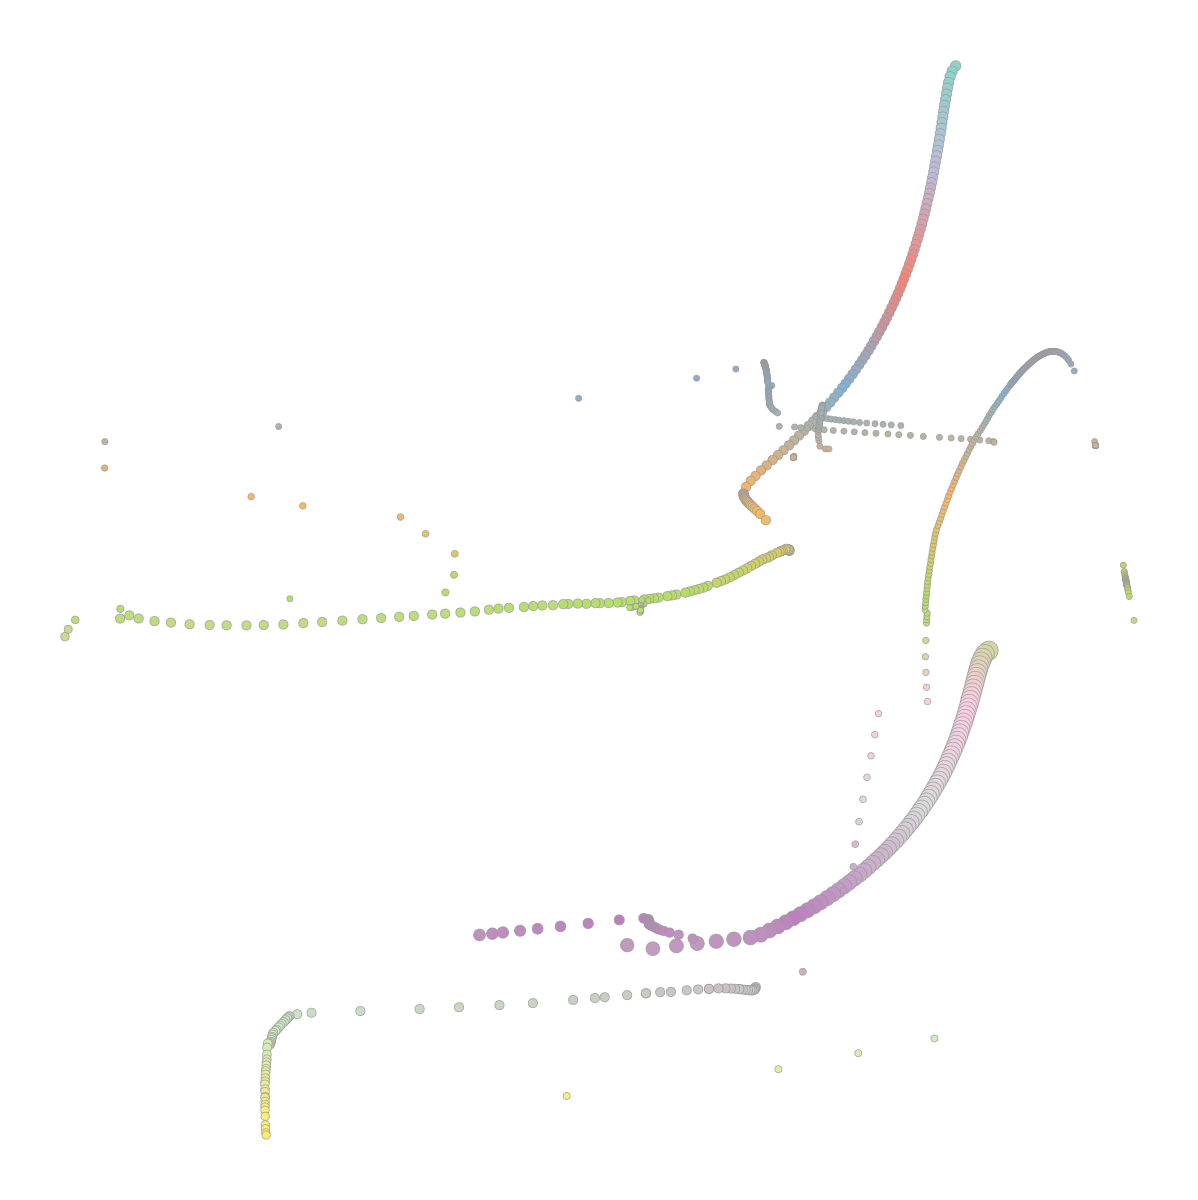

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9c14360340, at 0x7f9c04748df0>

In [15]:
gt.graph_draw(g, pos=g.vp.pos, vertex_fill_color=g.vp.lum,vertex_size=gt.prop_to_size(g.vp.mass, mi=3, ma=9.5, log=False, power=2))

In [52]:
posv=np.array([g.vp.pos[i] for i in g.vertices()])

In [28]:
posv

array([[0.83313374, 0.        ],
       [0.82984443, 0.00489532],
       [0.82795225, 0.01015225],
       ...,
       [0.994736  , 0.4926836 ],
       [0.9955485 , 0.49627077],
       [1.        , 0.51857473]])

In [18]:
for v in g.vertices(): print 

In [57]:
 poss = g.vp.pos.get_2d_array([0, 1])


In [64]:
np.shape(poss[:])

(2, 800)

In [22]:
gg, gpos = gt.geometric_graph(g, ibin)

In [23]:
gu = gt.graph_union(gg, g, intersection=g.vertex_index, internal_props=True)

None


In [31]:
gu.copy_property(gpos, tgt=gu.vp.pos_, g=gg)

In [34]:
gu.vp.pos_ = gt.sfdp_layout(gu, pos=gu.vp.pos_, K=1.5)

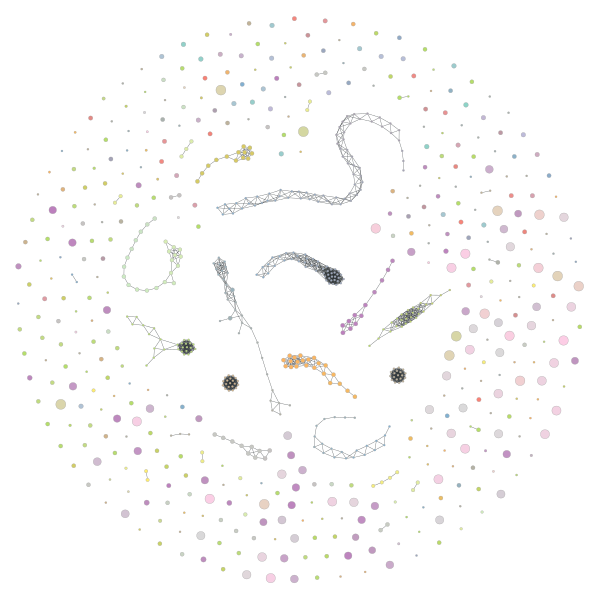

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f530b256ef0, at 0x7f530b2b4c18>

In [35]:
gt.graph_draw(gu, pos=gu.vp.pos_, vertex_fill_color=gu.vp.lum,vertex_size=gt.prop_to_size(gu.vp.mass, mi=2, ma=10, log=False, power=2))

In [36]:
def make_gif(g, points, a, b, step):
    bin = a
    g.vp.pos_ = gt.sfdp_layout(g, pos=g.vp.pos, K=1.5)
    graphs = [g]
    while bin <= b:
        gg, gpos = gt.geometric_graph(points, bin)

        gu=graphs[-1].copy()
        ggedgelist=gg.get_edges()
        guedgelist=gu.get_edges()
        for edge in ggedgelist:
            if not(edge in guedgelist):
                gu.add_edge(edge[0], edge[1]) 
        gu.vp.pos_ = gt.sfdp_layout(gu, pos=gu.vp.pos_, max_iter=8, init_step=0.5, K=1.5)
        graphs.append(gu)
        
        bin+=step
    return graphs


In [37]:
graphlist = make_gif(gu, posv, ibin,fbin, init_foot)

<Graph object, undirected, with 800 vertices and 1551 edges at 0x7f530b247828>
<Graph object, undirected, with 800 vertices and 1826 edges at 0x7f530b247860>
<Graph object, undirected, with 800 vertices and 1878 edges at 0x7f530b247c18>
<Graph object, undirected, with 800 vertices and 1904 edges at 0x7f530b247898>
<Graph object, undirected, with 800 vertices and 1920 edges at 0x7f530b247e80>
<Graph object, undirected, with 800 vertices and 1938 edges at 0x7f534de58f60>
<Graph object, undirected, with 800 vertices and 1951 edges at 0x7f530b2b4780>
<Graph object, undirected, with 800 vertices and 1961 edges at 0x7f530b2b4908>
<Graph object, undirected, with 800 vertices and 1966 edges at 0x7f530b247748>
<Graph object, undirected, with 800 vertices and 1967 edges at 0x7f530b247278>
<Graph object, undirected, with 800 vertices and 1969 edges at 0x7f530b24d208>
<Graph object, undirected, with 800 vertices and 1970 edges at 0x7f530b24d438>
<Graph object, undirected, with 800 vertices and 197

In [42]:
for i, gu in enumerate(graphlist):
    gt.graph_draw(gu, pos=gu.vp.pos_, vertex_fill_color=gu.vp.lum,edge_color= "white", edge_pen_width=0.5, vertex_size=gt.prop_to_size(gu.vp.mass, mi=2, ma=10, log=False, power=2), output="draw %i.png" %i)